<a href="https://colab.research.google.com/github/kittimaxz/Project_BoneAge/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/alexbaramilis/predicting-gender-from-human-hand-x-rays-part-1

In [1]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [3]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [4]:
import glob

# Kaggle
test_path = os.path.join(path,'boneage-training-dataset/')
train_path = os.path.join(path,'boneage-training-dataset/')
test_labels_path = os.path.join(path,'boneage-test-dataset.csv')
train_labels_path = os.path.join(path,'boneage-training-dataset.csv')

In [5]:
file_ext = '.png'
file_ext

'.png'

In [6]:
m_test = 200 # number of examples
m_test

200

In [7]:
m_train = 12611
m_train

12611

In [8]:
test_filelist = glob.glob(test_path + '*' + file_ext) # returns a list of all the pngs in the folder - not in order
test_filelist

['/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8894.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8902.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8920.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8921.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8901.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8895.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8912.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8919.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8903.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8915.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8911.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8900.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-datas

In [9]:
train_filelist = glob.glob(train_path + '*' + file_ext)
train_filelist

['/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8894.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8902.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8920.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8921.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8901.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8895.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8912.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8919.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8903.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8915.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8911.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-dataset/8900.png',
 '/content/drive/My Drive/Project_Boneage/boneage-training-datas

In [10]:
import numpy as np
import PIL

print(PIL.PILLOW_VERSION)
print(np.version.version)

7.1.2
1.21.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  after removing the cwd from sys.path.


In [11]:
def zero_pad_array_to_square_centered(arr):
    dimension_difference = arr.shape[0] - arr.shape[1] # height - width
    if dimension_difference > 0: # height > width
        pad_vert_before = 0
        pad_vert_after = 0
        pad_hori_before = round(dimension_difference/2)
        pad_hori_after = dimension_difference - pad_hori_before
        pixels_added = dimension_difference*arr.shape[0]
    elif dimension_difference < 0: # height < width
        dimension_difference = abs(dimension_difference)
        pad_vert_before = round(dimension_difference/2)
        pad_vert_after = dimension_difference - pad_vert_before
        pad_hori_before = 0
        pad_hori_after = 0
        pixels_added = dimension_difference*arr.shape[1]
    else:
        pad_vert_before = 0
        pad_vert_after = 0
        pad_hori_before = 0
        pad_hori_after = 0
        pixels_added = 0
    arr = np.pad(arr, [(pad_vert_before, pad_vert_after), (pad_hori_before, pad_hori_after)], mode='constant')
    return arr, pixels_added

# SOME TEST CASES (Optional - Run if you want)

In [12]:
a = np.array([[1,2], [3,4]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[1 2]
 [3 4]]
after:
[[1 2]
 [3 4]]
pixels added: 0



In [13]:
a = np.array([[1,2,3], [4,5,6]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[1 2 3]
 [4 5 6]]
after:
[[1 2 3]
 [4 5 6]
 [0 0 0]]
pixels added: 3



In [14]:
a = np.array([[1,2,3,4], [5,6,7,8]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[1 2 3 4]
 [5 6 7 8]]
after:
[[0 0 0 0]
 [1 2 3 4]
 [5 6 7 8]
 [0 0 0 0]]
pixels added: 8



In [15]:
a = np.array([[1,2,3,4,5], [6,7,8,9,10]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
after:
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 0  0  0  0  0]]
pixels added: 15



In [16]:
a = np.array([[1,2,3,4,5,6], [7,8,9,10,11,12]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
after:
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
pixels added: 24



In [17]:
a = np.array([[1,2], [3,4], [5,6]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[1 2]
 [3 4]
 [5 6]]
after:
[[1 2 0]
 [3 4 0]
 [5 6 0]]
pixels added: 3



In [18]:
a = np.array([[1,2], [3,4], [5,6], [7,8]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
after:
[[0 1 2 0]
 [0 3 4 0]
 [0 5 6 0]
 [0 7 8 0]]
pixels added: 8



In [19]:
a = np.array([[1,2], [3,4], [5,6], [7,8], [9,10]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
after:
[[ 0  0  1  2  0]
 [ 0  0  3  4  0]
 [ 0  0  5  6  0]
 [ 0  0  7  8  0]
 [ 0  0  9 10  0]]
pixels added: 15



In [20]:
a = np.array([[1,2], [3,4], [5,6], [7,8], [9,10], [11,12]])
print('before:\n{}\nafter:\n{}'.format(a, zero_pad_array_to_square_centered(a)[0]))
print('pixels added: {}\n'.format(zero_pad_array_to_square_centered(a)[1]))

before:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
after:
[[ 0  0  1  2  0  0]
 [ 0  0  3  4  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0  7  8  0  0]
 [ 0  0  9 10  0  0]
 [ 0  0 11 12  0  0]]
pixels added: 24



In [21]:
from IPython.display import clear_output # for the progress meter

In [22]:
def pad_dataset(filelist, m):

    #padded_array_list = [] # Mac
    shapes = []
    total_pixels_added = 0
    total_pixels = 0

    for i in range(0, m):
        # Padding
        img = PIL.Image.open(filelist[i]) # load the image
        arr = np.array(img) # convert to numpy array
        arr, pixels_added = zero_pad_array_to_square_centered(arr) # pad
        #padded_array_list.append(arr) # Mac
        # Collect info
        shapes.append(arr.shape[0])
        total_pixels_added = total_pixels_added + pixels_added
        total_pixels = total_pixels + arr.shape[0]*arr.shape[1]
        # Progress meter
        clear_output(wait=True) # wait until next print to clear output, so we don't fill the entire screen!
        print('Processing... example {} - Progress: {:0.0f}%'.format(i+1, (i+1)*100/m))
    
    print('\npadded data ratio: {:0.2f}%\n'.format((total_pixels_added/total_pixels)*100))
    print('smallest final size: {}x{}'.format(min(shapes), min(shapes)))
    print('biggest final size: {}x{}\n'.format(max(shapes), max(shapes)))
    
    # return padded_array_list, shapes # Mac
    return shapes # Kaggle

In [23]:
%%time

# test_array_list, shapes_test = pad_dataset(test_filelist, m_test) # Mac
shapes_test = pad_dataset(test_filelist, m_test) # Kaggle

Processing... example 200 - Progress: 100%

padded data ratio: 20.76%

smallest final size: 1000x1000
biggest final size: 2970x2970

CPU times: user 10.7 s, sys: 488 ms, total: 11.1 s
Wall time: 1min 33s


In [24]:
%%time

shapes_train = pad_dataset(train_filelist, m_train) # Kaggle
#train_array_list, shapes_train = pad_dataset(train_filelist, m_train) # Mac

Processing... example 12611 - Progress: 100%

padded data ratio: 21.42%

smallest final size: 677x677
biggest final size: 3001x3001

CPU times: user 8min 56s, sys: 23 s, total: 9min 19s
Wall time: 11min 2s


In [25]:
import matplotlib.pyplot as plt

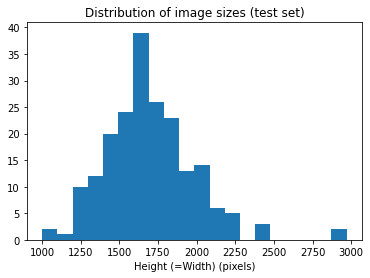

mean: 1697 pixels, standard deviation: 290.67077321258154


In [26]:
plt.hist(shapes_test, bins=20)
plt.title("Distribution of image sizes (test set)")
plt.xlabel("Height (=Width) (pixels)")
plt.show()

print('mean: {:0.0f} pixels, standard deviation: {}'.format(np.mean(shapes_test), np.std(shapes_test)))

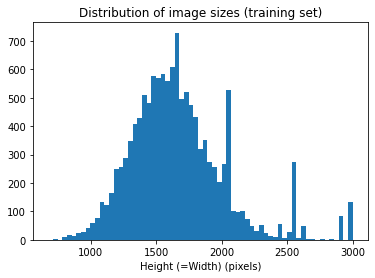

mean: 1668 pixels, standard deviation: 366.648899946424


In [27]:
plt.hist(shapes_train, bins='auto')
plt.title("Distribution of image sizes (training set)")
plt.xlabel("Height (=Width) (pixels)")
plt.show()

print('mean: {:0.0f} pixels, standard deviation: {}'.format(np.mean(shapes_train), np.std(shapes_train)))

In [28]:
new_size = (256, 256)

In [29]:
new_size

(256, 256)

In [30]:
del shapes_test, shapes_train # Kaggle
# del shapes_test, shapes_train, test_array_list, train_array_list # Mac

In [31]:
# Kaggle
def pad_and_resize(filename, new_size = (256, 256)):
    arr = np.array(PIL.Image.open(filename)) # convert image to numpy array
    arr = zero_pad_array_to_square_centered(arr)[0] # pad
    img = PIL.Image.fromarray(arr) # convert array back to image
    img = img.resize(new_size, PIL.Image.LANCZOS) # resize
    return np.array(img) # and back to array

In [32]:
# Kaggle
import concurrent.futures

def pad_and_resize_concurrently(filelist):
    with concurrent.futures.ProcessPoolExecutor() as executor:
        array_list = []
        for arr in executor.map(pad_and_resize, filelist):
            array_list.append(arr)
        return np.array(array_list)

In [33]:
%%time

# Kaggle

test_array_padded_resized = pad_and_resize_concurrently(test_filelist)
train_array_padded_resized = pad_and_resize_concurrently(train_filelist)

CPU times: user 22.3 s, sys: 6.5 s, total: 28.7 s
Wall time: 20min 42s


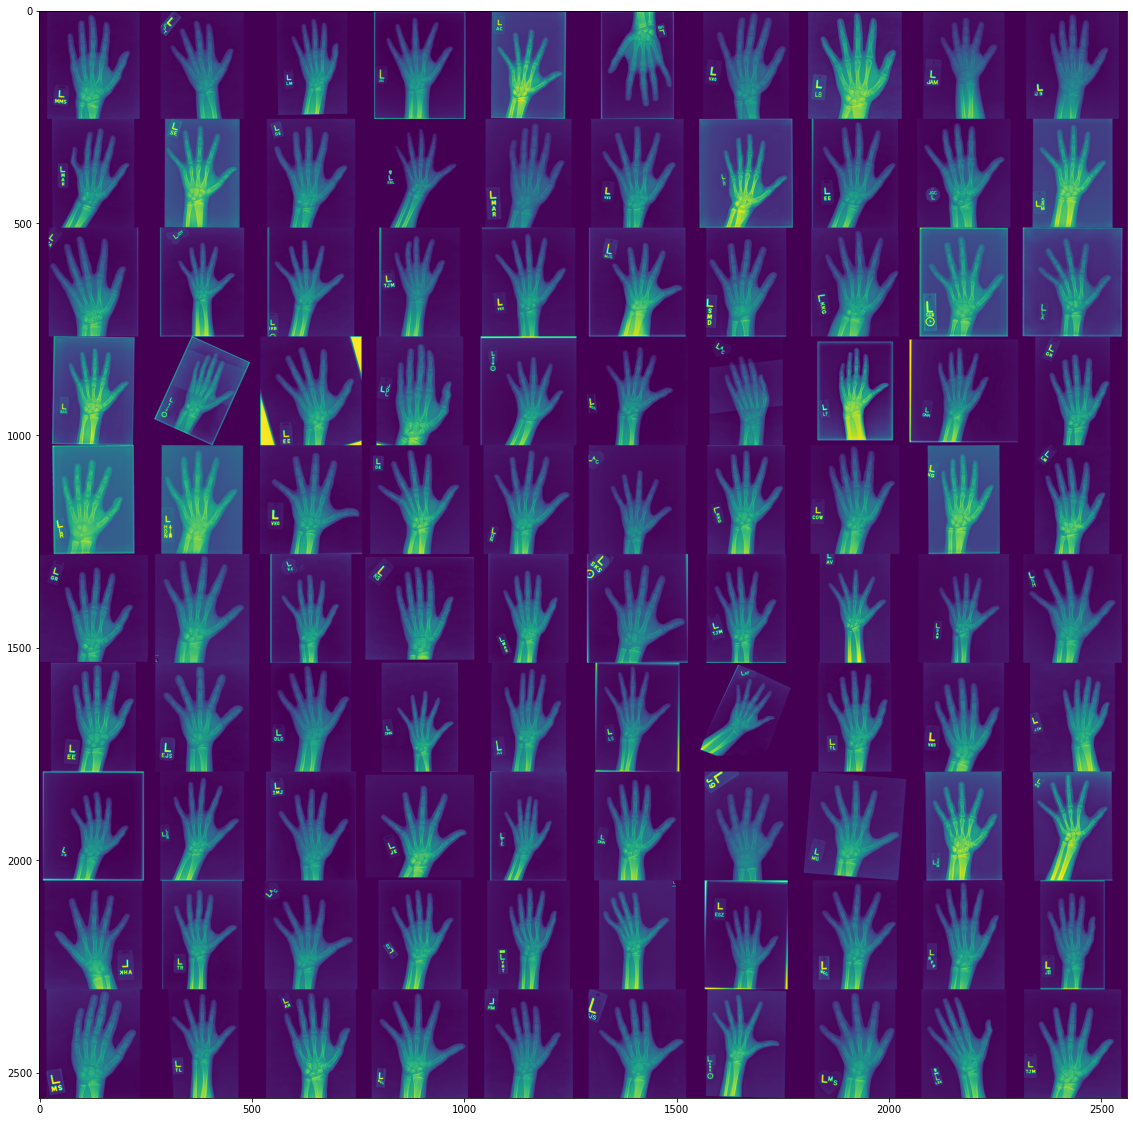

In [34]:
rows = 10
cols = 10
height = new_size[0]
width = new_size[1]

zombie = train_array_padded_resized[2000:2100].reshape(rows, cols, height, width).swapaxes(1,2).reshape(height*rows, width*cols)
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(zombie)
plt.show()

In [35]:
%%time

test_array_flattened = test_array_padded_resized.reshape(test_array_padded_resized.shape[0], -1).T
train_array_flattened = train_array_padded_resized.reshape(train_array_padded_resized.shape[0], -1).T

print ("test_array_flattened shape: " + str(test_array_flattened.shape))
print ("train_array_flattened shape: " + str(train_array_flattened.shape))

test_array_flattened shape: (65536, 12613)
train_array_flattened shape: (65536, 12613)
CPU times: user 202 µs, sys: 10 µs, total: 212 µs
Wall time: 191 µs


# Example (Optional)

In [ ]:
test_array_normalized = (test_array_flattened - np.min(test_array_flattened))/(np.max(test_array_flattened) - np.min(test_array_flattened))
test_array_normalized2 = 2*test_array_normalized - 1
test_array_standardized = (test_array_flattened - np.mean(test_array_flattened))/np.std(test_array_flattened)

In [ ]:
print('Normalized 1')
print('min:', np.min(test_array_normalized))
print('max:', np.max(test_array_normalized))
print('mean:', np.mean(test_array_normalized))
print('std:', np.std(test_array_normalized))

In [ ]:
print('Normalized 2')
print('min:', np.min(test_array_normalized2))
print('max:', np.max(test_array_normalized2))
print('mean:', np.mean(test_array_normalized2))
print('std:', np.std(test_array_normalized2))

In [ ]:
print('Standardized')
print('min:', np.min(test_array_standardized))
print('max:', np.max(test_array_standardized))
print('mean:', np.mean(test_array_standardized))
print('std:', np.std(test_array_standardized))

In [ ]:
%%time

test_X = test_array_flattened/255.
train_X = train_array_flattened/255.

In [ ]:
del test_array_padded_resized, test_array_flattened, train_array_padded_resized, train_array_flattened

In [ ]:
gender_test_labels = np.genfromtxt(test_labels_path, dtype='uint16', delimiter=',', 
                         skip_header=1, converters={1: lambda x: 0 if x == b'F' else 1})

gender_test_labels = dict(gender_test_labels) # convert to dictionary for quick retrieval

In [ ]:
test_Y = []
for filename in test_filelist:
    file_id = filename[len(test_path):-len(file_ext)] # removes 'rsna-bone-age/boneage-test-dataset/' and '.png'
    test_Y.append(gender_test_labels[int(file_id)]) # appends the gender for the corresponding id

In [ ]:
test_Y = np.array(test_Y) # convert to numpy array (don't do dtype='uint8', you'll regret it later!)
test_Y = test_Y.reshape(1, test_Y.shape[0]) # reshape to single row

In [ ]:
print(test_Y)

In [ ]:
print(test_Y.shape)

In [ ]:
print(test_Y.dtype)

In [ ]:
gender_train_labels = np.genfromtxt(train_labels_path, dtype='uint16', delimiter=',', 
                         skip_header=1, converters={2: lambda x: 0 if x == b'False' else 1}, usecols = (0, 2))

gender_train_labels = dict(gender_train_labels) # convert to dictionary for quick retrieval

In [ ]:
train_Y = []
for filename in train_filelist:
    file_id = filename[len(train_path):-len(file_ext)] # removes 'rsna-bone-age/boneage-training-dataset/' and '.png'
    train_Y.append(gender_train_labels[int(file_id)]) # appends the gender for the corresponding id

In [ ]:
train_Y = np.array(train_Y) # convert to numpy array (don't do dtype='uint8', you'll regret it later!)
train_Y = train_Y.reshape(1, train_Y.shape[0]) # reshape t

In [ ]:
print(train_Y)

In [ ]:
print(train_Y.shape)

In [ ]:
print(train_Y.dtype)

In [ ]:
m_test = test_X.shape[1]
m_train = train_X.shape[1]

In [ ]:
print ("testing examples: {}".format(m_test))

In [ ]:
print ("training examples: {}".format(m_train))

In [ ]:
print ("test_X shape: {}, type: {}".format(test_X.shape, test_X.dtype))

In [ ]:
print ("test_Y shape: {}, type: {}".format(test_Y.shape, test_Y.dtype))

In [ ]:
print ("train_X shape: {}, type: {}".format(train_X.shape, train_X.dtype))

In [ ]:
print ("train_Y shape: {}, type: {}".format(train_Y.shape, train_Y.dtype))

In [ ]:
def sigmoid(z): # z: a scalar or numpy array of any size
    return 1/(1+np.exp(-z))

In [ ]:
# TEST
import matplotlib.pyplot as plt
z = np.array([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.plot(z, sigmoid(z))
plt.show()

In [ ]:
def initialize_with_zeros(vector_length):
    return np.zeros((vector_length, 1)), 0 # w, b

In [ ]:
# TEST
w, b = initialize_with_zeros(train_X.shape[0])

In [ ]:
print(w)

In [ ]:
print(w.shape)

In [ ]:
print(b)

In [ ]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
        
    # FORWARD PROPAGATION - compute activations
    Z = np.dot(w.T, X) + b # ex. w.T: (1, 65536), X: (65536, 12611) -> dot: (1, 12611)
    A = sigmoid(Z) # A: (1, 12611)
    
    # BACKWARD PROPAGATION - compute gradients
    dw = np.dot(X,(A-Y).T)/m # X: (65536, 12611), (A-Y).T: (12611, 1) -> dw: (65536, 1)
    db = np.sum(A-Y)/m # (A-Y): (1, 12611) -> db: float64
    
    return dw, db, A

In [ ]:
# TEST
print('train_X')
print(train_X)
print(train_X.shape)
print('W, B')

In [ ]:
W, B = initialize_with_zeros(train_X.shape[0])
print(W)
print(W.shape)
print(B)

In [ ]:
Z = np.dot(W.T, train_X) + B
print('Z')
print(Z)
print(Z.shape)

In [ ]:
A = sigmoid(Z)
print('A')
print(A)
print(A.shape)
print('log(A)')

In [ ]:
LN = np.log(A)
print(LN)
print(LN.shape)
print('train_Y')
print(train_Y)
print(train_Y.shape)

In [ ]:
L = -train_Y*np.log(A)-(1-train_Y)*np.log(1-A)
print('L')
print(L)
print(L.shape)
print('J')

In [ ]:
J = np.sum(L)/train_X.shape[1]
print(J)
print(J.shape)

In [ ]:
# ANOTHER TEST (I had to do this to find the uint8 bug)
print('x')
x = np.array([[0.1, 0.2, 0.3, 0.4],[0.5, 0.6, 0.7, 0.8]]).T # (4, 2)
print(x)
print(x.shape)

In [ ]:
print('w, b')
w, b = initialize_with_zeros(x.shape[0]) # (4, 1), int
print(w)
print(w.shape)
print(b)

In [ ]:
z = np.dot(w.T, x) + b # w.T: (1,4) x (4,2) = (1,2)
print('z')
print(z)
print(z.shape)

In [ ]:
a = sigmoid(z)
print('a')
print(a)
print(a.shape)

In [ ]:
print('log(a)')
ln = np.log(a)
print(ln)
print(ln.shape)

In [ ]:
print('y')
y = np.array([[1, 0]])
print(y)
print(y.shape)

In [ ]:
l = -y*np.log(a)-(1-y)*np.log(1-a)
print('l')
print(l)
print(l.shape)

In [ ]:
print('j')
j = np.sum(l)/x.shape[1]
print(j)
print(j.shape)

In [ ]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X))
    return np.where(A <= 0.5, 0, 1) # for each entry in A, if it's <= 0.5, return 0, otherwise return 1

In [ ]:
from IPython.display import clear_output # for the progress meter

def optimize(w, b, train_X, train_Y, iterations, learning_rate):
    
    w_list = []
    b_list = []
    A_list = []
    
    for i in range(iterations):
            
        # do one forward and backward pass
        dw, db, A = propagate(w, b, train_X, train_Y)
        
        # update lists
        w_list.append(w)
        b_list.append(b)
        A_list.append(A)
        
        # update parameters
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # progress meter
        clear_output(wait=True) # wait until next print to clear output, so we don't fill the entire screen!
        print('Processing... iteration {}/{} - Progress: {:0.1f}%'.format(i+1, iterations, (i+1)*100./iterations))
    
    # append the final values of w, b and A
    w_list.append(w)
    b_list.append(b)
    A_list.append(propagate(w, b, train_X, train_Y)[2]) 
    
    return w_list, b_list, A_list

In [ ]:
def evaluate(train_X, train_Y, test_X, test_Y, w_list, b_list, A_list):
    
    m = train_X.shape[1]
    
    costs = []
    test_accuracies = []
    train_accuracies = []
    
    for i in range(len(w_list)):
        
        # compute cost
        L = -train_Y*np.log(A_list[i])-(1-train_Y)*np.log(1-A_list[i]) # ex. Y: (1, 12611), log(A): (1, 12611), ... -> L: (1, 12611)
        J = np.sum(L)/m # J: float64
        costs.append(J)

        # calculate accuracies for the training set
        train_Y_hat = np.where(A_list[i] <= 0.5, 0, 1)
        train_accuracies.append(100 - np.mean(np.abs(train_Y_hat - train_Y)) * 100)
        
        # calculate accuracies for the test set
        test_Y_hat = predict(w_list[i], b_list[i], test_X)
        test_accuracies.append(100 - np.mean(np.abs(test_Y_hat - test_Y)) * 100)

    return costs, test_accuracies, train_accuracies

In [ ]:
%%time
# TRAIN THE MODEL

# INITIALIZE PARAMETERS
iterations = 5000 # Note to future self: "Run just a few iterations first to make sure there are no bugs!"
learning_rate = 0.003 # if higher (I tried 0.0035), it oscillates
w, b = initialize_with_zeros(train_X.shape[0])

# TRAIN
w_list, b_list, A_list = optimize(w, b, train_X, train_Y, iterations, learning_rate)

# 2000 iterations: 22min wall, 1h 25min user
# 10000 iterations: 1h 46min wall, 6h 53min user
# 20000 iterations: 3h 43min wall, 14h 3min user

In [ ]:
print('w_list - shape:', np.array(w_list).shape)
print('b_list - shape:', np.array(b_list).shape)
print('A_list - shape:', np.array(A_list).shape)

In [ ]:
%%time
# EVALUATE THE MODEL

costs, test_accuracies, train_accuracies = evaluate(train_X, train_Y, test_X, test_Y, w_list, b_list, A_list)

# 2000 iterations: test 58%, train 63%
# 10000 iterations: test 61.5%, train 69.13%
# 20000 iterations: test 61%, train 72% -> overfitting?

In [ ]:
print('final test accuracy: {:0.2f}%'.format(test_accuracies[-1]))
print('final train accuracy: {:0.2f}%'.format(train_accuracies[-1]))
print('\ncosts - length:', len(costs))
print('test_accuracies - length:', len(test_accuracies))
print('train_accuracies - length:', len(train_accuracies))

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['font.size'] = 15.0
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.figure()

plt.subplot(121)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))

plt.subplot(122)
plt.plot(test_accuracies, '-b', label='test')
plt.plot(train_accuracies, '-r', label='train')
plt.legend(loc='upper left')
plt.ylabel('accuracies')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))

plt.show()

In [ ]:
%%time
# FURTHER TRAINING (Pick up from last save, not new game!)

# INITIALIZE PARAMETERS
iterations = 0
learning_rate = 0.003 # if higher (I tried 0.0035), it oscillates
w = w_list[-1] # load the final values from the previous training
b = b_list[-1]

# TRAIN
new_w_list, new_b_list, new_A_list = optimize(w, b, train_X, train_Y, iterations, learning_rate)

# MERGE
w_list = w_list + new_w_list[1:]
b_list = b_list + new_b_list[1:]
A_list = A_list + new_A_list[1:]

# Then you can run:
#
# - EVALUATE THE MODEL
# - PLOT THE LEARNING CURVE & ACCURACIES
# - SAVE THE RESULTS (Mac)
# ...
# ... AND ...
# ...
# - FURTHER TRAINING again if you want to :)

In [ ]:
print('new_w_list - shape:', np.array(new_w_list).shape)
#print('new_w_list:', np.array(new_w_list))
print('new_b_list - shape:', np.array(new_b_list).shape)
#print('new_b_list:', np.array(new_b_list))
print('new_A_list - shape:', np.array(new_A_list).shape)
#print('new_A_list:', np.array(new_A_list))
print('w_list - shape:', np.array(w_list).shape)
#print('w_list:', np.array(w_list))
print('b_list - shape:', np.array(b_list).shape)
#print('b_list:', np.array(b_list))
print('A_list - shape:', np.array(A_list).shape)
#print('A_list:', np.array(A_list))